# CS 436 CS5310 - Computer Vision - Assignment#4 - Part#2

*__Submission Instructions:__*
- Rename this notebook to `PA4_rollnumber.ipynb` before submission on LMS.
- Code for all the tasks must be written in this notebook (you do not need to submit any other files).
- The output of all cells must be present in the version of the notebook you submit.
- The university honor code should be maintained. Any violation, if found, will result in disciplinary action.

In [15]:
#Mount your google drive to this notebook
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#This was my working directory(change this to your working directory)
%cd /content/gdrive/My Drive/PA#4

In [3]:
#imports
import keras
from keras.datasets import fashion_mnist,mnist,cifar10
from keras.layers import Activation, Input, Embedding, LSTM, Dense, Lambda, GaussianNoise, concatenate
from keras.models import Model
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam, RMSprop
from keras.constraints import max_norm
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten, Activation, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.losses import categorical_crossentropy as logloss
from keras.metrics import categorical_accuracy
from keras.applications import vgg16
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib import offsetbox
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sn
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add
import struct
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from yolo3 import *
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os


Using TensorFlow backend.


## Overview
Object detection is a task in computer vision that involves identifying the presence, location, and type of one or more objects in a given photograph.In recent years, deep learning techniques have achieved state-of-the-art results for object detection. Notable is the “You Only Look Once,” or YOLO, family of Convolutional Neural Networks that achieve near state-of-the-art results with a single end-to-end model that can perform object detection in real-time, we will be running YOLO-V3 for this assignment.

In this assignment you will :
- Run the pre-trained YOLO-V3 object detector on a sample image.
- Run the pre-trained YOLO-V3 object detctor  on images from PETS dataset(provided to you).
- From the object detected images we will create a top/satellite view.






## Task 1: Preapring the pre-trained model for a test run

Evaluate the performance of a pretrained network YOLO-V3 on a sample zebra image provided to you:
- Download the pre-trained model weights file "yolov3.weights"(provided to you) and place them into your current working directory. 
- Download the "yolo3.py" file provided to you and place it into your current working directory, this file contains all the helper functions we will be using for this part.
- Define the Keras model for YOLOv3 and load the downloaded weight file into this model.
- Run it on the sample image "zebra.jpg" provided to you.


In [4]:
#Define the yolo-v3 model. Call function "make_yolov3_model()" 
#This function will return a yolo-v3 model instance
#TO DO
model = make_yolov3_model()

In [5]:
#Load the model weights. Call function "WeightReader()" and pass the name of the downloaded weight file as
#an argument to this function, this function will return a weight reader instance
#TO DO
weight_reader = WeightReader('yolov3.weights')

In [6]:
#Set the model weights into the model instance. Call function your_weight_reader_instance".load_weights()"
#and pass the yolo-v3 model instance as an argument
#TO DO
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [7]:
#Input dminesions required by our model, we will be resizing our input image to this dimension
input_w, input_h = 416, 416
#Enter the path of zebra image in the variable "photo_filename"
photo_filename = 'zebra.jpg'
#Load and prepare image(Done for you)
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

In [8]:
#Make prediction and save them in a variable named "yhat"
yhat=model.predict(image)
#TO DO
# summarize the shape of the list of arrays(Done for you)
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [9]:
#Define anchors(Done for you)
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
#Define the probability threshold for detected objects(Done for you)
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
    #Decode the output of the network(Done for you)
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

In [10]:
#Correct the sizes of the bounding boxes for the shape of the image(Done for you)
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

In [11]:
#Suppress non-maximal boxes(Done for you)
do_nms(boxes, 0.5)

In [12]:
#Get the labels, scores and box coordinates(Done for you)
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
#Get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

In [13]:
#Summarize what we found(Done for you)
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

zebra 94.91060376167297
zebra 99.86329674720764
zebra 96.87087535858154


## Task 2: Visualizing extracted predictions as bounding boxes

We have extracted predictions from the object detctor that you can observe are very accurate too. Now we need to visualize these predictions as bounding boxes on the input image. For this part you are supposed to wite a function "draw_boxes" to visualize your predictions as bounding boxes. Inputs to this function will be outputs of the function "get_boxes". This function should also save the image along with the bounding boxes in your current working directory. Also show the predicted label and score for each bounding box. Sample output is shown to you.

In [14]:
from matplotlib.patches import Circle

def draw_boxes(filename, v_boxes, v_labels, v_scores,im):
    center_list = []
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    for i in range(len(v_boxes)):
        box = v_boxes[i]
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        width, height = x2 - x1, y2 - y1
        
        rect = Rectangle((x1, y1), width, height, fill=False, color='white',lw=3.0 )
        
        centerpointX = x1 + (width/2)
        centerpointY = y1 + (height/2)
        
        center_list.append(tuple((centerpointX, centerpointY)))
        
        ax.add_patch(rect)
        label = "%s (%.3f)" % (v_labels[i], v_scores[i])
        pyplot.text(x1,y1,label,color="white")
        
    pyplot.axis('off')
    pyplot.savefig(im, bbox_inches = 'tight', pad_inches = 0)
    pyplot.show()
    return center_list

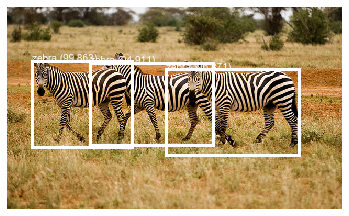

[(274.5, 185.5), (142.5, 185.0), (431.0, 201.0)]


In [15]:
#Draw the bounding boxes on the sample image
# TO DO
photo_filename = 'zebra.jpg'
center_list = draw_boxes(photo_filename, v_boxes, v_labels, v_scores, 'zebraEdited.jpg')
print(center_list)

## Task 3: Perfroming object detection on all images in the PETS dataset(provided to you)
Now when you have succesfully executed the code for object detection, we want you to perform object dection on all images in the PETS dataset provided to you and save them in a seperate folder in your working directory. In this part you will perform object detection in each of the images from different camera views in the PETS dataset. You have been given 10 images per view and 3 views in total.



truck 80.28603792190552
person 99.17540550231934
person 99.59834814071655
person 98.96760582923889
car 95.86513638496399


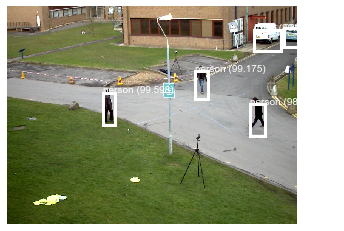

truck 79.65958714485168
person 99.42554235458374
person 99.4152843952179
person 98.94090294837952
car 95.92564105987549


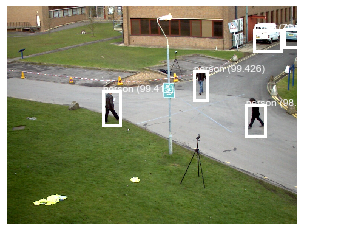

truck 78.04719805717468
person 99.29443001747131
person 99.49527382850647
person 99.53848719596863
car 96.8348741531372


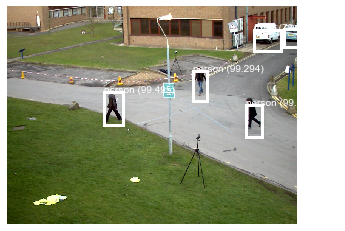

truck 81.4749002456665
person 95.52691578865051
person 99.3480920791626
person 99.19469356536865
car 97.29617238044739


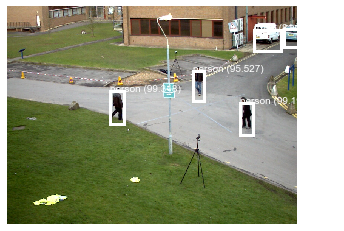

truck 79.96358275413513
person 61.89796328544617
person 98.78836274147034
person 99.54380393028259
car 96.11135125160217
person 90.24078249931335


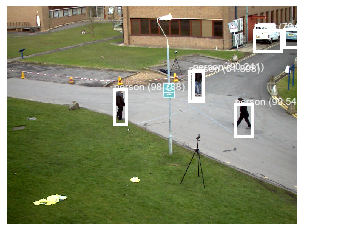

truck 81.27736449241638
person 98.16571474075317
person 98.96833896636963
person 99.39746856689453
car 96.03101015090942


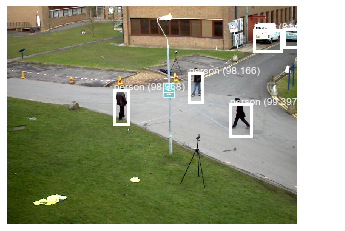

truck 71.42907977104187
person 99.59222674369812
person 99.31935667991638
person 98.98721575737
car 62.32314109802246
car 97.08116054534912


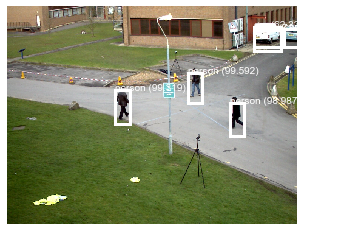

truck 81.83822631835938
person 99.41655993461609
person 99.46718215942383
person 98.42605590820312
car 96.11752033233643


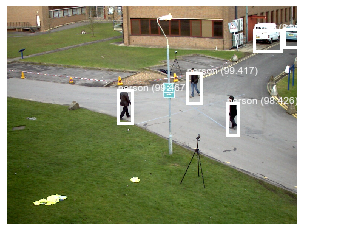

truck 77.35735177993774
person 98.91350865364075
person 98.68927597999573
car 96.46466374397278
person 96.72569036483765


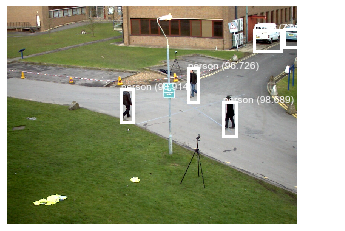

truck 76.9612967967987
person 98.34928512573242
person 98.29226732254028
person 99.45698976516724
car 96.33856415748596


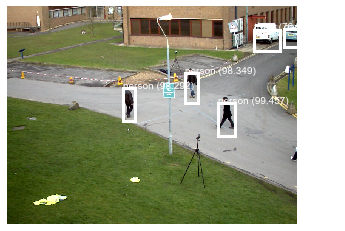

person 73.32563400268555
car 93.8468337059021
person 68.21867227554321


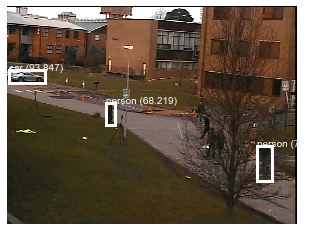

person 79.53425645828247
car 96.05058431625366
person 97.0061182975769


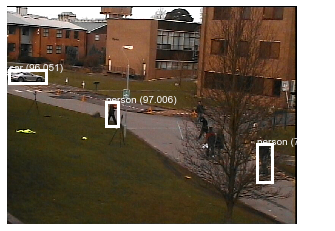

person 73.33298325538635
person 75.09281635284424
car 95.13163566589355
person 94.1587507724762


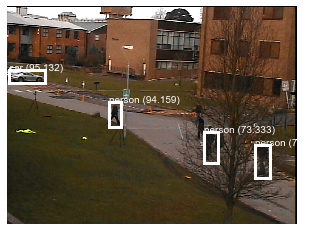

person 71.24735713005066
car 95.8233118057251
person 96.8942403793335


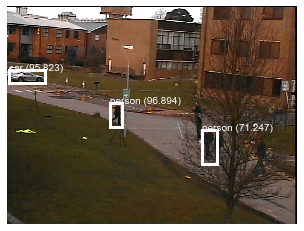

person 71.02822661399841
car 96.99714183807373
person 63.36681246757507


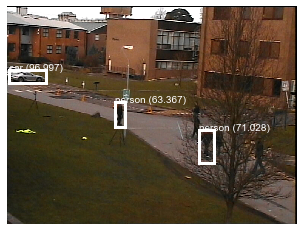

person 83.12277793884277
car 96.30371332168579
person 91.48526191711426


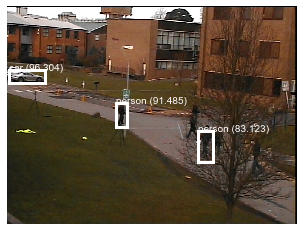

car 96.94419503211975
person 67.84436702728271


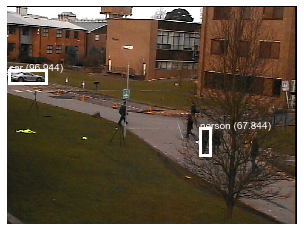

person 82.00029134750366
car 95.33897638320923


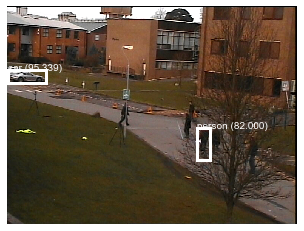

person 70.1738178730011
car 96.17390632629395
person 93.80828142166138
person 86.2116277217865


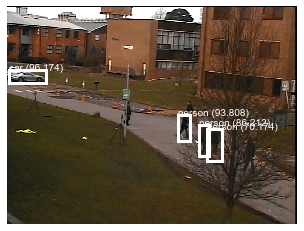

person 86.7523729801178
person 62.78907656669617
person 81.632000207901
car 95.91615200042725
person 68.52253675460815
person 88.39901685714722
person 97.7378785610199


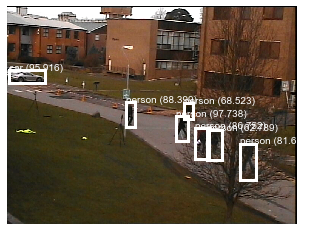

person 84.87430810928345
person 92.16631650924683
person 98.27187657356262
person 99.51518774032593
person 98.76198768615723
person 83.65337252616882


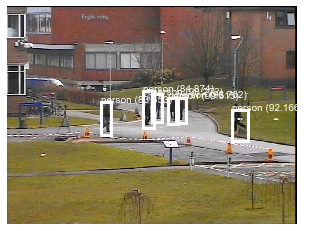

person 92.77359247207642
person 99.16466474533081
person 99.57995414733887
person 98.17677140235901
person 89.1592800617218


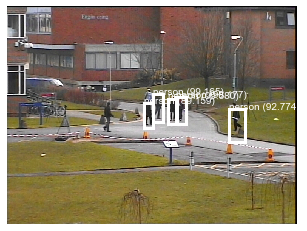

person 84.41661596298218
person 84.28962826728821
person 89.1804039478302
person 99.31650757789612
person 99.34865832328796
person 99.06530976295471


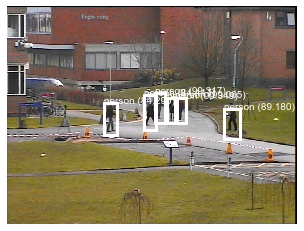

person 97.6860761642456
person 97.52519130706787
person 94.38843727111816
person 98.66552352905273
person 99.76119995117188
person 99.5351254940033
person 95.05842328071594


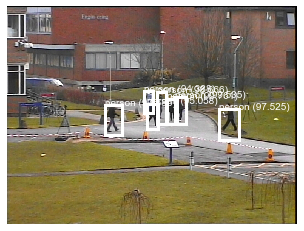

person 75.1985490322113
person 97.74471521377563
person 94.84595656394958
person 99.48208332061768
person 80.43041825294495
person 99.43118095397949
person 99.15942549705505
person 96.97691798210144


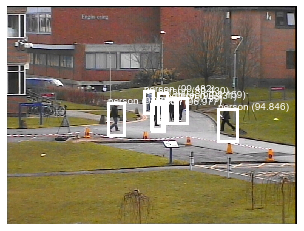

person 99.40922856330872
person 99.67739582061768
person 99.19957518577576
person 97.83393144607544
person 88.67239356040955


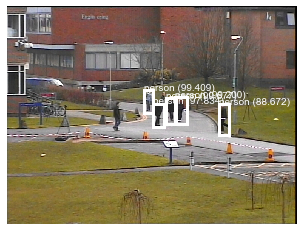

person 91.53298139572144
person 99.64848756790161
person 97.03212380409241
person 98.8362729549408
person 94.60572004318237
person 94.08011436462402


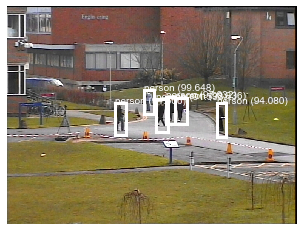

person 92.1831727027893
person 96.9382107257843
person 96.23184204101562
person 99.34070110321045
person 80.78160285949707
person 99.36164617538452


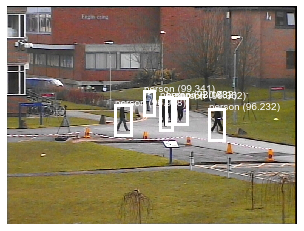

person 92.1831727027893
person 96.9382107257843
person 96.23184204101562
person 99.34070110321045
person 80.78160285949707
person 99.36164617538452


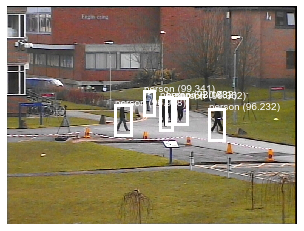

person 97.73220419883728
person 90.22186398506165
person 95.8055853843689
person 99.5826244354248
person 98.41861128807068


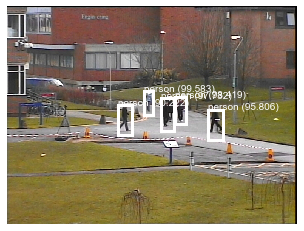

In [16]:
CenterPoints = []

for l in range(1,4):
    for j in range(0,10):
        photo_filename = 'PETS/View_00' + str(l) + '/frame_000'+ str(j) + '.jpg'
        image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
        yhat = model.predict(image)
        boxes = list()
        for i in range(len(yhat)):
            boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
        correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
        do_nms(boxes, 0.6)
        v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
        for i in range(len(v_boxes)):
            print(v_labels[i], v_scores[i])
        centers = draw_boxes(photo_filename, v_boxes, v_labels, v_scores, 'PETS/View_00'+ str(l) +'/frame_000'+ str(j) + 'new.jpg') 
        CenterPoints.append(centers)

## Task 4: Viewing detected object location on Top View/Satellite view

In this part we will use the output from the previous part to project the location of detected objects on the top view/satellite view so that we can analyze all the objects present in the scene in one single view.

In this task you will :
- Go to the following link (http://maps.google.co.uk/maps?f=q&source=s_q&hl=en&geocode=&q=university+of+reading&sll=51.438895,-0.945747&sspn=0.007544,0.014055&ie=UTF8&ll=51.438895,-0.945747&sspn=0.007544,0.014055&ie=UTF8&ll=51.438534,-0.944561&spn=0.000943,0.001757&t=h&z=19) and capture a satellite view of the area that has been shown in the images of the PETS dataset
- Now perform object detection on all the images from PETS dataset provided to you. 
- Find the corresponding points in the satellite view image and any one of your object detected images.
- Compute the homography between the corresponding points. 
- Object detector will give you a list of bounding boxes, note the mid-point of the base of bounding box and project it on to the top view/satellite view using the computed homography. Top view/satellite view generated from a sample object detected image is provided to you for better understanding.
- Save all the top view images in a seperate folder in your working directory and submit it with the assignment on LMS.
- You need to perform all the above mentioned steps for each view seperately.

In [17]:
print(CenterPoints)

[[(688.0, 90.0), (513.5, 208.0), (268.0, 271.0), (663.0, 301.0), (750.5, 82.5)], [(688.0, 90.0), (511.5, 209.0), (276.5, 270.0), (657.0, 301.5), (750.5, 83.0)], [(688.5, 90.0), (509.5, 210.5), (280.5, 270.0), (653.0, 302.5), (750.5, 83.0)], [(688.5, 90.0), (506.0, 211.5), (290.0, 268.0), (633.0, 298.0), (750.5, 82.5)], [(688.0, 89.5), (499.5, 211.0), (298.0, 265.0), (624.5, 300.5), (750.5, 83.0), (505.5, 205.0)], [(688.0, 89.5), (499.0, 215.0), (301.5, 265.5), (617.5, 301.0), (750.5, 82.5)], [(688.0, 90.0), (496.5, 216.0), (305.5, 266.0), (608.5, 299.5), (688.0, 81.0), (750.5, 83.0)], [(688.0, 90.0), (494.0, 216.0), (311.5, 264.5), (596.0, 297.0), (750.5, 83.0)], [(688.0, 90.0), (317.0, 262.0), (588.5, 297.0), (750.5, 83.0), (491.5, 209.0)], [(687.5, 89.5), (487.5, 216.0), (321.5, 260.0), (581.0, 299.5), (750.5, 82.5)], [(681.5, 415.0), (52.0, 185.0), (272.0, 285.0)], [(681.5, 414.0), (52.0, 185.0), (277.5, 284.0)], [(539.0, 373.5), (675.5, 411.5), (52.0, 185.0), (285.0, 286.5)], [(535

In [18]:
CenterPoints1 = np.asarray(CenterPoints) 
print(CenterPoints)

[[(688.0, 90.0), (513.5, 208.0), (268.0, 271.0), (663.0, 301.0), (750.5, 82.5)], [(688.0, 90.0), (511.5, 209.0), (276.5, 270.0), (657.0, 301.5), (750.5, 83.0)], [(688.5, 90.0), (509.5, 210.5), (280.5, 270.0), (653.0, 302.5), (750.5, 83.0)], [(688.5, 90.0), (506.0, 211.5), (290.0, 268.0), (633.0, 298.0), (750.5, 82.5)], [(688.0, 89.5), (499.5, 211.0), (298.0, 265.0), (624.5, 300.5), (750.5, 83.0), (505.5, 205.0)], [(688.0, 89.5), (499.0, 215.0), (301.5, 265.5), (617.5, 301.0), (750.5, 82.5)], [(688.0, 90.0), (496.5, 216.0), (305.5, 266.0), (608.5, 299.5), (688.0, 81.0), (750.5, 83.0)], [(688.0, 90.0), (494.0, 216.0), (311.5, 264.5), (596.0, 297.0), (750.5, 83.0)], [(688.0, 90.0), (317.0, 262.0), (588.5, 297.0), (750.5, 83.0), (491.5, 209.0)], [(687.5, 89.5), (487.5, 216.0), (321.5, 260.0), (581.0, 299.5), (750.5, 82.5)], [(681.5, 415.0), (52.0, 185.0), (272.0, 285.0)], [(681.5, 414.0), (52.0, 185.0), (277.5, 284.0)], [(539.0, 373.5), (675.5, 411.5), (52.0, 185.0), (285.0, 286.5)], [(535

In [19]:
print(len(CenterPoints))

30


In [136]:
im_src = cv2.imread('PETS/View_001/frame_0000new.jpg')
# pts_src = np.array([[98.4575,78.9309],[172.382,73.7562],[190.863,45.6648],[8.26931,52.318],[221.912,42.7078],[135.42,61.189]])
pts_src = np.array([[99,78],[174,75],[190,46],[10,52],[223,42],[136,62]])
# pts_src = np.array([[70,108],[144,105],[160,76],[5,60],[190,70],[100,90]])
# pts_src = np.array([[130,50],[200,45],[220,10],[40,20],[253,12],[166,32]])

im_dst = cv2.imread('Satellite_View.png')
pts_dst = np.array([[416,456],[528,420],[517,222],[189,281],[551,155],[453,351]])

h, status = cv2.findHomography(pts_src,pts_dst)

for i in range(0,10):
    for x in CenterPoints[i]:
        onePoint = np.asarray([x[0], x[1], 1])
        pointAfterMultiplying = np.dot(h,onePoint)

        firstx = int(pointAfterMultiplying[0] / pointAfterMultiplying[2])
        secondx = int(pointAfterMultiplying[1] / pointAfterMultiplying[2])
        im_dst = cv2.circle(im_dst, (firstx,secondx), 10, (0, 0, 255), thickness=3, lineType=8, shift=0)
    cv2.imwrite('Results/FirstView' + str(i) + '.jpg', im_dst)

In [137]:
im_src = cv2.imread('PETS/View_002/frame_0000new.jpg')
# pts_src = np.array([[98.4575,78.9309],[172.382,73.7562],[190.863,45.6648],[8.26931,52.318],[221.912,42.7078],[135.42,61.189]])
pts_src = np.array([[129,105],[194,108],[228,99],[84,83],[275,102],[171,100]])

im_dst = cv2.imread('Satellite_View.png')
pts_dst = np.array([[416,456],[528,420],[517,222],[189,281],[551,155],[453,351]])

h, status = cv2.findHomography(pts_src,pts_dst)

for i in range(10,20):
    for x in CenterPoints[i]:
        onePoint = np.asarray([x[0], x[1], 1])
        pointAfterMultiplying = np.dot(h,onePoint)

        firstx = int(pointAfterMultiplying[0] / pointAfterMultiplying[2])
        secondx = int(pointAfterMultiplying[1] / pointAfterMultiplying[2])
        im_dst = cv2.circle(im_dst, (firstx,secondx), 10, (0, 0, 255), thickness=3, lineType=8, shift=0)
    cv2.imwrite('Results/SecondView' + str(i) + '.jpg', im_dst)

In [138]:
im_src = cv2.imread('PETS/View_003/frame_0000new.jpg')
# pts_src = np.array([[98.4575,78.9309],[172.382,73.7562],[190.863,45.6648],[8.26931,52.318],[221.912,42.7078],[135.42,61.189]])
pts_src = np.array([[129,105],[194,108],[210,124],[20,108]])

im_dst = cv2.imread('Satellite_View.png')
pts_dst = np.array([[416,456],[528,420],[467,580],[853,591]])

h, status = cv2.findHomography(pts_src,pts_dst)

for i in range(10,20):
    for x in CenterPoints[i]:
        onePoint = np.asarray([x[0], x[1], 1])
        pointAfterMultiplying = np.dot(h,onePoint)

        firstx = int(pointAfterMultiplying[0] / pointAfterMultiplying[2])
        secondx = int(pointAfterMultiplying[1] / pointAfterMultiplying[2])
        im_dst = cv2.circle(im_dst, (firstx,secondx), 10, (0, 0, 255), thickness=3, lineType=8, shift=0)
    cv2.imwrite('Results/ThirdView' + str(i) + '.jpg', im_dst)

<IPython.core.display.Javascript object>


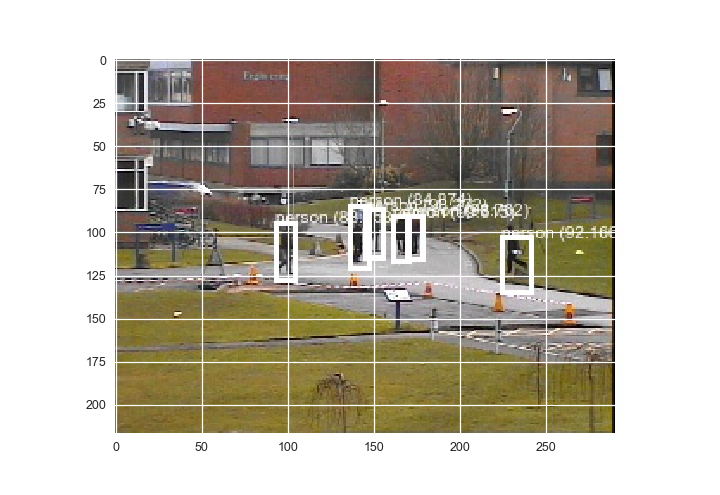

In [100]:
# import matplotlib.pyplot as plt
# %matplotlib notebook
# image = plt.imread('PETS/View_003/frame_0000new.jpg')
# plt.imshow(image, interpolation='none') # Plot the image, turn off interpolation
# plt.show()

<IPython.core.display.Javascript object>


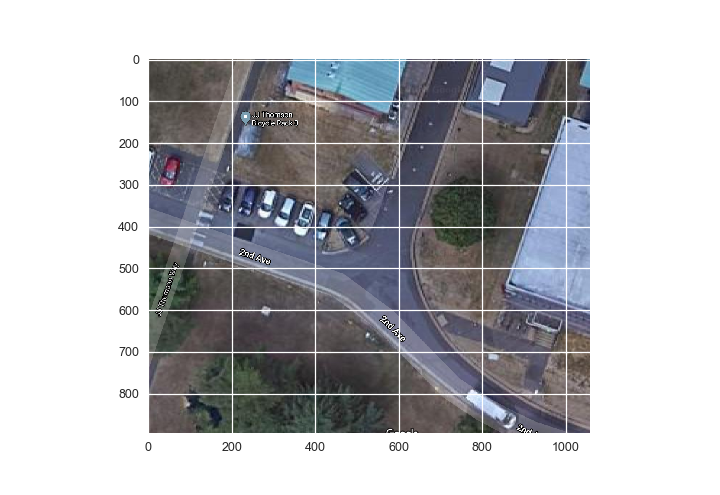

In [99]:
# import matplotlib.pyplot as plt
# %matplotlib notebook
# image = plt.imread('Satellite_View.png')
# plt.imshow(image, interpolation='none') # Plot the image, turn off interpolation
# plt.show()


In [142]:
# im_src = cv2.imread('PETS/View_001/frame_0000new.jpg')
# pts_src = np.array([[416,456],[528,420],[517,222],[189,281],[551,155],[453,351]])
# im_dst = cv2.imread('Satellite_View.png')
# pts_dst = np.array([[137,109],[243,104],[263,66],[17,74],[307,59],[189,84]])
# h, status = cv2.findHomography(pts_dst, pts_src)
# im_out = cv2.warpPerspective(im_dst, h, (im_src.shape[1],im_src.shape[0]))
# print(h)
# cv2.imshow("Source Image", im_src)
# cv2.imshow("Destination Image", im_dst)
# cv2.imshow("Warped Source Image", im_out)
# cv2.waitKey(0)

In [ ]:
# im_src = cv2.imread('Results/First_image_frame_0004.jpg')
# pts_src = np.array([[266.736,84.3093],[180.202,79.6736],[106.03,85.019]])

# im_dst = cv2.imread('SatelliteView.png')
# pts_dst = np.array([[149.91, 142.588],[116.388,136.303],[73.0885,150.27]])

# h, status = cv2.findHomography(pts_src, pts_dst)
# im_out = cv2.warpPerspective(im_dst, h, (im_src.shape[1],im_src.shape[0]))
# cv2.imshow("Source Image", im_src)
# cv2.imshow("Destination Image", im_dst)
# cv2.imshow("Warped Source Image", im_out)
# cv2.waitKey(0)

In [139]:
# def draw_circle(event,x,y,flags,param):
#     global mouseX,mouseY
#     if event == cv2.EVENT_LBUTTONDBLCLK:
#         cv2.circle(img,(x,y),2,(255,0,0),-1)
#         mouseX,mouseY = x,y

# img = cv2.imread('Satellite_View.png')
# cv2.namedWindow('image')
# cv2.setMouseCallback('image',draw_circle)

# while(1):
#     cv2.imshow('image',img)
#     k = cv2.waitKey(20) & 0xFF
#     if k == 27:
#         break
#     elif k == ord('a'):
#         print(mouseX,mouseY)

In [140]:
# im_src = cv2.imread('Satellite_View.png')

# cv2.circle(im_src, (416,456), 2, (0, 255, 0), -1)
# cv2.circle(im_src, (528,420), 2, (0, 255, 0), -1) 
# cv2.circle(im_src, (517,222), 2, (0, 255, 0), -1) 
# cv2.circle(im_src, (189,281), 2, (0, 255, 0), -1) 
# cv2.circle(im_src, (551,155), 2, (0, 255, 0), -1) 
# cv2.circle(im_src, (453,351), 2, (0, 255, 0), -1) 
# cv2.imshow("Source Image", im_src)

# cv2.waitKey(0)


In [141]:
# im_src = cv2.imread('Results/First_image_frame_0004.jpg')
# pts_src = np.array([[266.736,84.3093],[180.202,79.6736],[106.03,85.019]])
# im_dst = cv2.imread('SatelliteView.png')
# pts_dst = np.array([[149.91, 142.588],[116.388,136.303],[73.0885,150.27]])
# h, status = cv2.findHomography(pts_src, pts_dst)
# im_out = cv2.warpPerspective(im_dst, h, (im_src.shape[1],im_src.shape[0]))
# cv2.imshow("Source Image", im_src)
# cv2.imshow("Destination Image", im_dst)
# cv2.imshow("Warped Source Image", im_out)
# cv2.waitKey(0)

In [42]:
# #Below is a sample image from the PETs dataset. You can also see "sample_image.jpg" provided to you
# im_src = cv2.imread('Results/First_image_frame_0004.jpg')
# pts_src = np.array([[266.736,84.3093],[180.202,79.6736],[106.03,85.019]])
# im_dst = cv2.imread('SatelliteView.png')
# pts_dst = np.array([[149.91, 142.588],[116.388,136.303],[73.0885,150.27]])
# h, status = cv2.findHomography(pts_src, pts_dst)


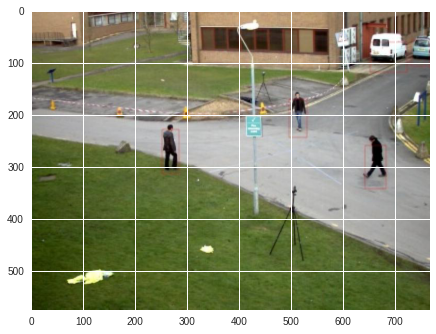

In [0]:
#Below is the ouput produced from the sample image after performing object detection. 
#You can also see "object_detcted.jpg" provided to you

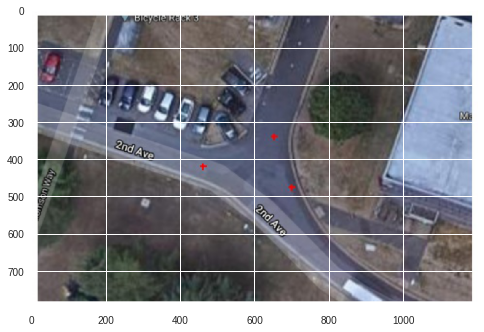

In [0]:
#Below is the ouput produced from the object detected image by projecting bounding box centers using computed homography. 
#You can also see "top-view-satellite.jpg" provided to you